# Traitement des données Adrien

---

Adrien est né le 28 décembre 2004. Il est fils unique. Sa mère est secrétaire juridique et son père est ingénieur. Adrien est un petit garçon coquin, qui aime faire des blagues, surtout à son chat. 

Adrien a un développement linguistique typique et adore répéter les nouveaux mots. Naomi Yamaguchi l’a filmé une heure par mois depuis qu’il a 15 mois et arrêté les enregistrements à 4;11,20.

# Nettoyage 

## Chargement des données

Récupèrer la liste des noms de fichier pour Julie :
* Ces fichiers sont placés dans un repertoire 'data/adrien_texte'
* Ils sont issuent d'une extraction sur le site colaje au format chat
* Nous les avons converti en format .txt afin de pouvoir les traiter avec python

In [1]:
import os 
import pandas as pd 

print(os.getcwd())
os.chdir('C:\\Users\\Lamou\\Desktop\\MIASHS\\TER_a\\data\\adrien_texte')
listing=os.listdir() # On crée une liste de tout les noms des fichiers

C:\Users\lamou\Desktop\MIASHS\TER_a


In [13]:
#listing

Nous avons 31 fichiers pour Adrien, chacun de ces fichiers corresepondent aux retrancriptions d'un enregistrement vidéo.


## Lecture des données

* Définir le nom des colonnes selon le fichier final attendu
* Lire chaque fichier de la liste 
* Ajouter les colonnes nom de l'enfant et son age
* La colonne age identifie de manière unique l'enregistrement

In [5]:
os.chdir('C:\\Users\\Lamou\\Desktop\\MIASHS\\TER_a\\data\\adrien_texte')

d = {} # Le dictionnaire contenant les noms des fichiers
nom_col = ['type', 'seconde_debut', 'seconde_fin', 'contenu']
rows = 0 #Compteur de ligne pour vérifier la perte de données

for file in listing: 
    d[file]=pd.read_csv(file, 
                        sep = '\t', 
                        names = nom_col, 
                        header = None)  

    # On ajoute le nom de l'enfant
    nom_pos1 = 0
    nom_pos2 = file.find('-')
    nom = file[nom_pos1:nom_pos2]
    d[file]['enfant'] = nom
    
    #On ajoute l'age de l'enfant
    age_pos1 = file.find('_')-1
    age_pos2 = file.find('.')
    age = file[age_pos1:age_pos2]
    d[file]['age'] = age
    
    rows += len(d[file])
    
    
# DataFrame contenant toutes les lignes de l'enfant
data = pd.concat([d[file] for file in listing], 
                 sort=False,
                 ignore_index=True) 

In [6]:
data.shape

(74154, 6)

## Vérification de la perte de données

On vérifie qu'il y a autant de ligne lu (variable rows) que de ligne écritent (len(data))

In [7]:
print(rows == len(data))

True


## Ordre des colonnes

In [8]:
data=data[['enfant', 'age','type', 'seconde_debut', 'seconde_fin', 'contenu']]
data.head()

,enfant,age,type,seconde_debut,seconde_fin,contenu
0,ADRIEN,1_03_09,+div+,0.0,1096.0,div |
1,ADRIEN,1_03_09,+div+,0.0,362.0,div |
2,ADRIEN,1_03_09,FAT,0.0,6.0,"hop , merde ."
3,ADRIEN,1_03_09,xgestes,NaN,NaN,Em prend le pommeau de douche
4,ADRIEN,1_03_09,sit,NaN,NaN,A est dans son bain.


## Création du fichier final format csv

In [10]:
# Création du fichier enfant
os.chdir('C:\\Users\\Lamou\\Desktop\\MIASHS\\TER_a\\data')
data.to_csv('data_adrien_final.csv',
           encoding = 'utf-8',
           sep = '\t',
           header = True)

On peut maintenant utiliser le fichier 'data_adrien_final.csv' pour l'exploration de données.

## Lecture fichier final

In [11]:
os.chdir('C:\\Users\\Lamou\\Desktop\\MIASHS\\TER_a\\data')
data_child = pd.read_csv('data_adrien_final.csv',
                           sep = '\t',
                           encoding = 'utf-8',
                           index_col=False)

# On supprime la colonne qui duplique les index
data_child = data_child.drop(columns = 'Unnamed: 0')

In [17]:
data_child.shape

(74154, 6)

# Exploration des données

---

Qu'elles sont les différents type de ligne ?

In [18]:
print(len(data_child['type'].unique()))

16


Il existe 16 types de ligne dans les fichiers Andrien :

In [11]:
print(data_child['type'].unique())

['+div+' 'FAT' 'act' 'CHI' 'xpnt' 'MOT' 'pho' 'sit' 'com' 'add' 'int'
 'BRO' '-div-' 'OBS' 'GIR' 'gpx' 'nof' 'disc' 'BAB' 'HOU' 'UNK' 'VOI'
 'dis' '@EG::' 'SIS' 'SAM']


## Les phonèmes

Les lignes de type 'pho' correspondent à la traduction phonétique lorsque d'Adrien s'exprime :
* Nous avons à disposition 17498 traductions pour Adrien 
* On distingue les premiers mots d'Adrien à l'age de un an 3 mois et 9 jours
* Les traductions s'arrêtent à l'age de 4 ans 3 mois et 26 jours

In [21]:
pho_child = data_child[data_child['type'] == 'pho']
#pho_child

### Valeurs NaN

Il n'existe pas de valeur NaN dans la colonne contenu

In [22]:
pho_child.loc[pho_child['contenu'].isna()]

,enfant,age,type,seconde_debut,seconde_fin,contenu


Nous allons chercher à visualiser la quantité phonétique de données à disposition

## Visualisation des données phonétiques

### Ajout des colonnes 'année', 'mois' et 'jour'

On considère que la colonne age a pout format : x_xx_xx (année_mois_jour) ainsi :
* ``pho_child['age'][0:1]`` nous donne le nombre d'année
* ``pho_child['age'][2:4]`` nous donne le nombre de mois
* ``pho_child['age'][5:7]`` nous donne le nombre de jours

In [25]:
# Ajout du nombre d'année
année_pho_child = pho_child.apply(lambda row: row['age'][0:1], axis=1)
pho_child['année'] = année_pho_child

# Ajout du nombre de mois
mois_pho_child = pho_child.apply(lambda row: row['age'][2:4], axis=1)
pho_child['mois'] = mois_pho_child

# Ajout du nombre de jour
jour_pho_child = pho_child.apply(lambda row: row['age'][5:7], axis=1)
pho_child['jour'] = jour_pho_child

C:\Users\lamou\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lamou\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\lamou\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [26]:
#pho_child

## Quantité de données

Combien avons-nous de ligne pour chaque année ? mois ? jour ?

### Quantité de données par année

In [27]:
nb_phrase_annee = pho_child[{'année','contenu'}].groupby('année').count()
nb_phrase_annee.rename(columns={'contenu': 'nb_phrase'})

,nb_phrase
année,
1,230
2,10705
3,4360
4,2203


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F28B7A6F28>],
      dtype=object)

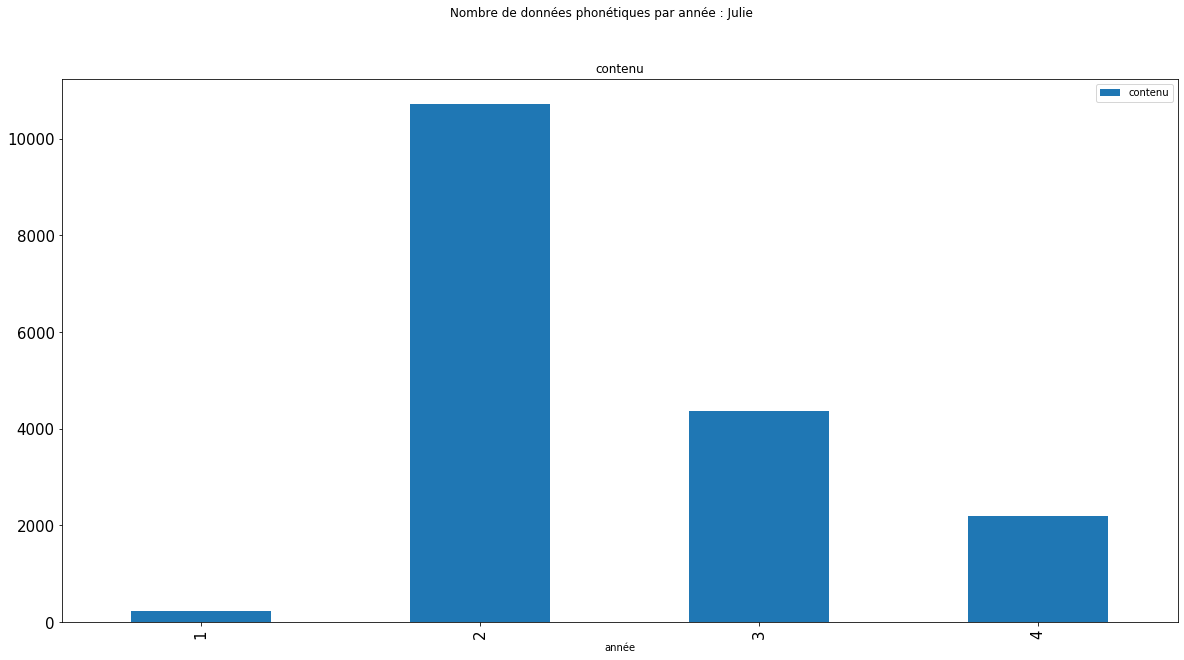

In [29]:
nb_phrase_annee.plot(kind='bar', 
                       subplots=True, 
                       figsize=(20,10),
                       title = 'Nombre de données phonétiques par année : Julie',
                       fontsize = 15,
                       use_index = True)

On voit qu'il y a des quantités de données phonétiques différentes pour chaques années :
* Nous avons très peu de données pour la première année (230 lignes)
* Nous avons beaucoup de données la deuxième année (10705 lignes)
* Il y a de moins en moins de données la troisième puis la quatrième année (4360 puis 2203 lignes)

### Quantité de données par mois

Regardons plus en détail la quantité de données phonétiques par mois :

In [30]:
nb_phrase_mois = pho_child[{'année','mois','contenu'}].groupby(['année','mois']).count()
nb_phrase_mois = nb_phrase_mois.rename(columns={'contenu': 'nb_phrase'})
nb_phrase_mois.unstack(level=1)

nb_phrase                                                               \
mois         00     01      02      03      04      05     07      08     09   
année                                                                          
1           NaN    NaN     NaN    46.0    63.0     NaN    NaN     NaN    NaN   
2         755.0  975.0  1155.0  1011.0  1010.0  1216.0  871.0  1380.0  716.0   
3         652.0  386.0   511.0   336.0   246.0   379.0    NaN   595.0  421.0   
4         628.0  365.0   536.0   674.0     NaN     NaN    NaN     NaN    NaN   

                      
mois       10     11  
année                 
1         NaN  121.0  
2      1312.0  304.0  
3       389.0  445.0  
4         NaN    NaN

Nous avons que peu de lignes pour les mois :
* 1,03,xx
* 1,04,xx
* 1,11,xx

On voit aussi qu'il y a des mois sans données, cela vérifie qu'il y ait moins de données pour les années 0 et 4, en effet les retranscriptions s'arrête à l'age 4,03,xx

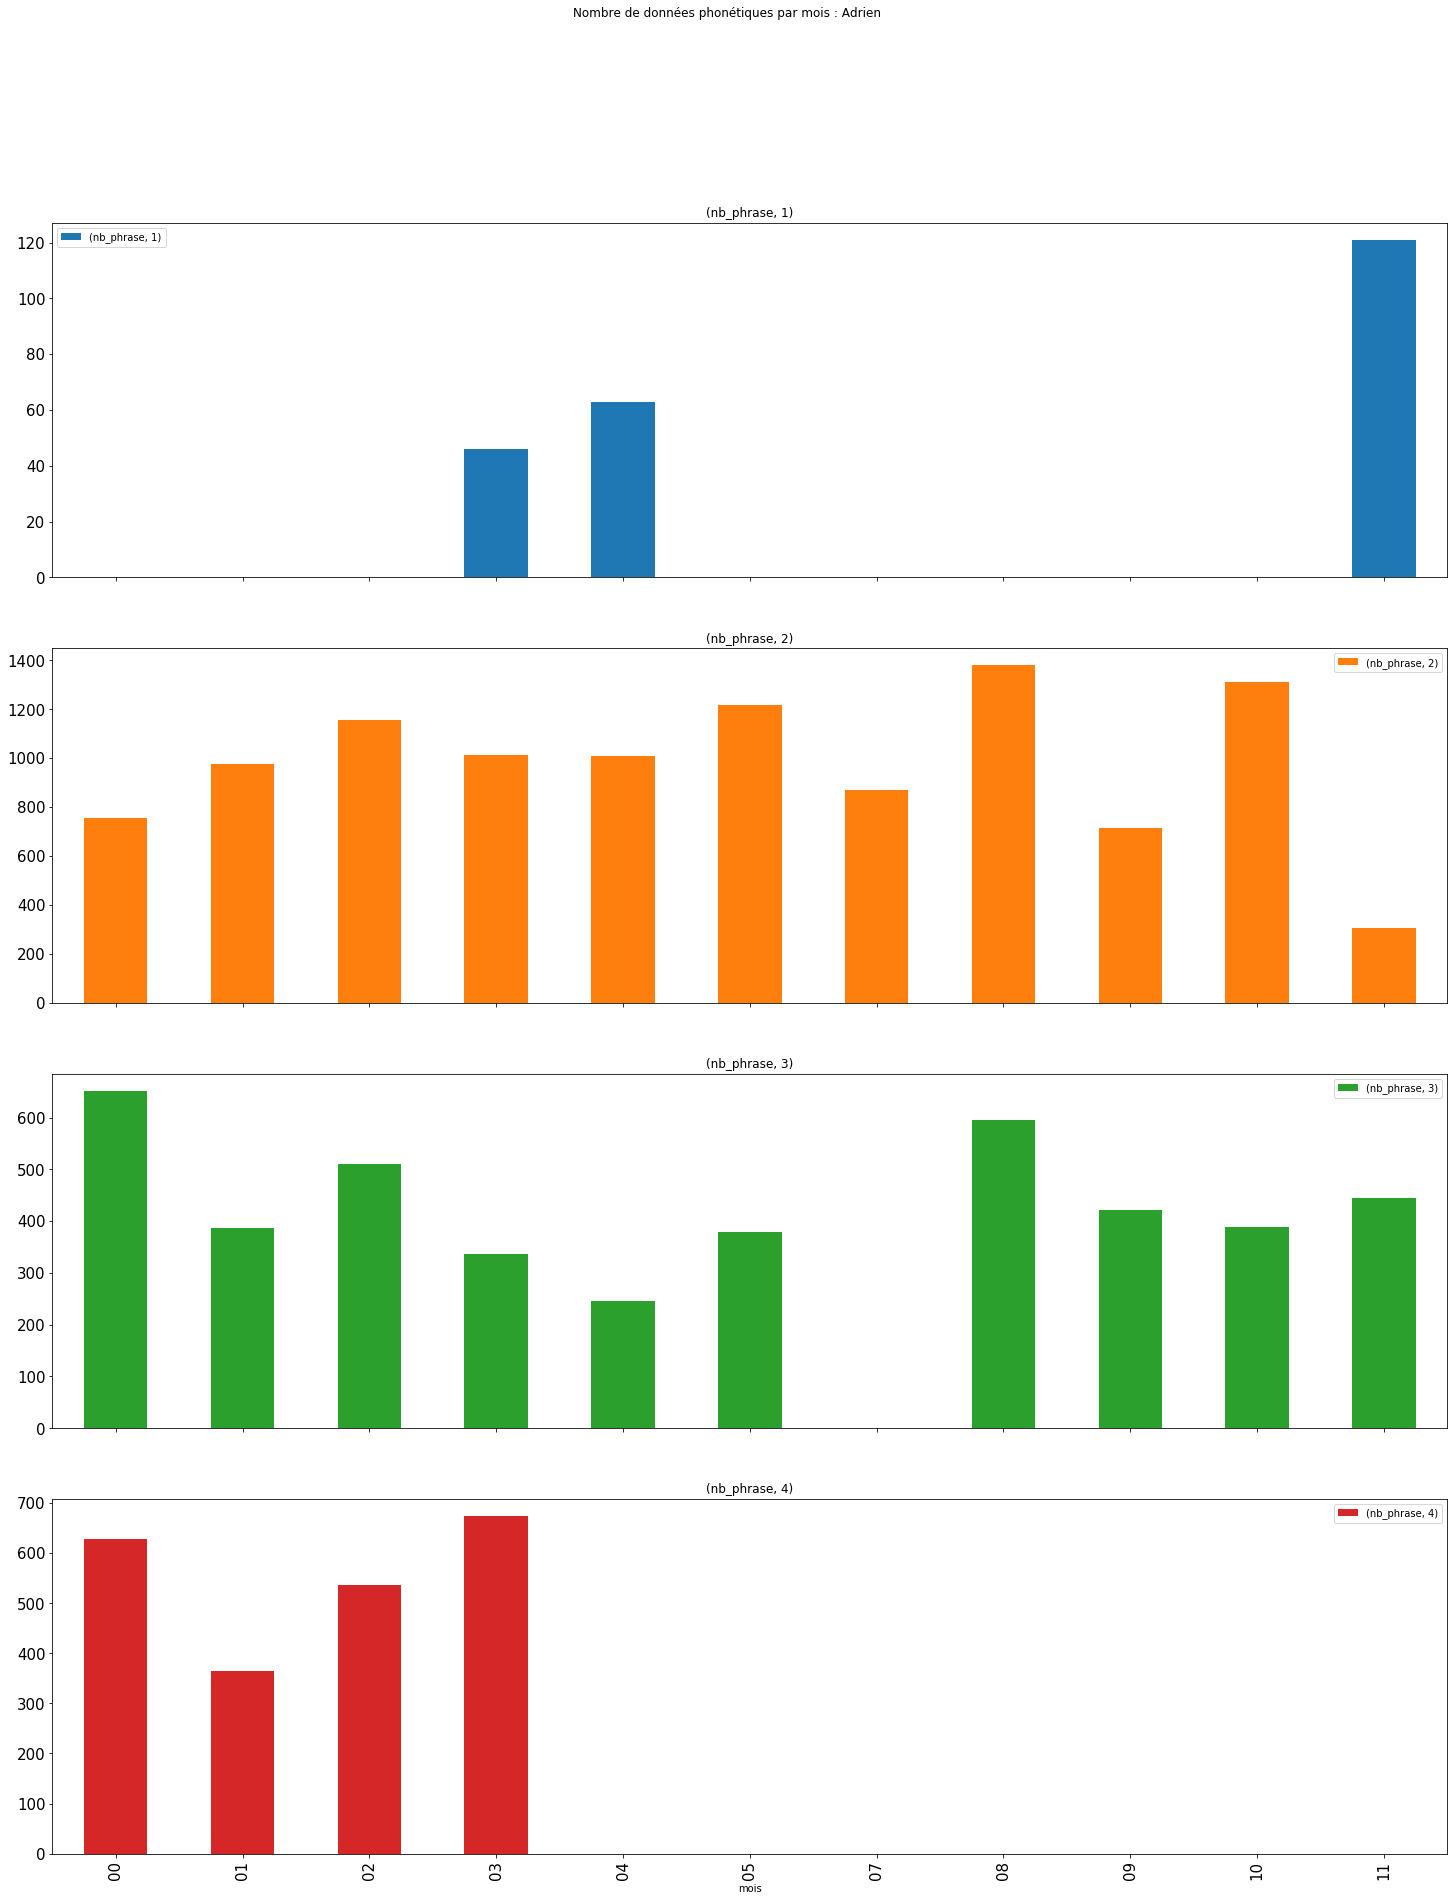

In [32]:
plt = nb_phrase_mois.unstack(level=0).plot(kind='bar', 
                                     subplots=True, 
                                     figsize=(25, 30),
                                     title = 'Nombre de données phonétiques par mois : Adrien',
                                     fontsize = 15,
                                     use_index = True)

On voit qu'il y a moins d'enregistrements effectués sur Julie la troisième année et surtout sur les quatrième et cinquième année (en effet elles ne contiennent qu'un mois avec une quantité de données significative)

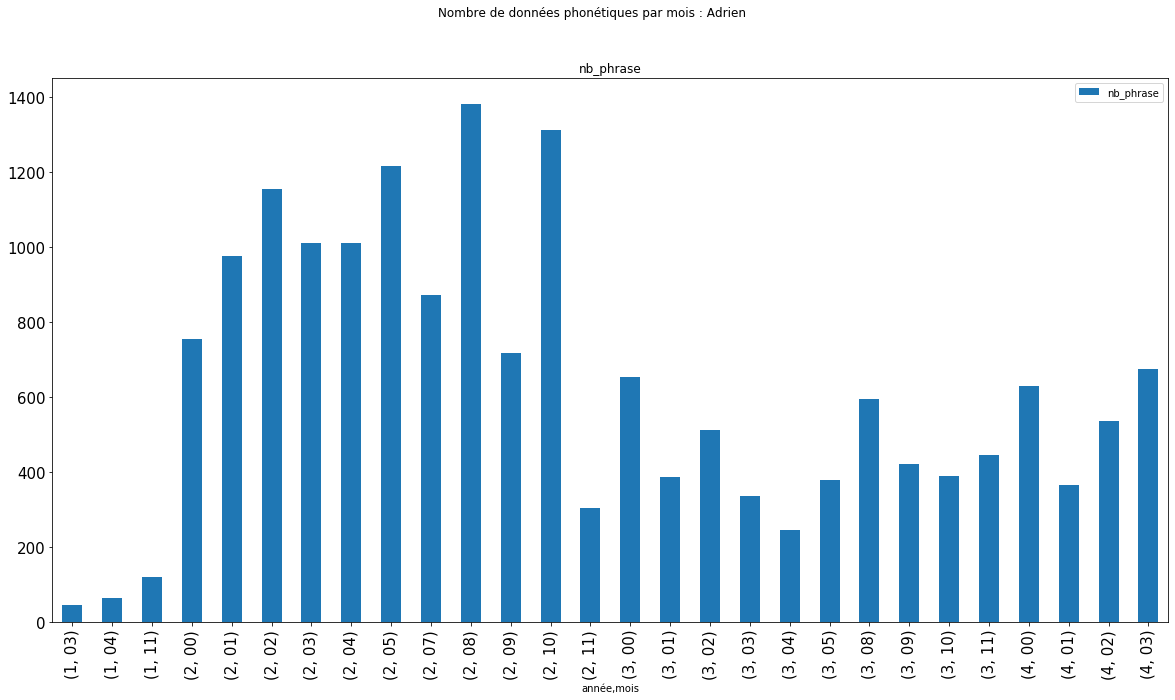

In [34]:
plt = nb_phrase_mois.plot(kind='bar',
                    subplots=True, 
                    figsize=(20, 10),
                    title = 'Nombre de données phonétiques par mois : Adrien',
                    fontsize = 15,
                    use_index = True)

### Quantité de données par jour

Regardons maintenant la quantité de données par jours :

In [37]:
nb_phrase_jour = pho_child[{'année','mois', 'jour', 'contenu'}].groupby(['année','mois', 'jour']).count()
nb_phrase_jour = nb_phrase_jour.rename(columns={'contenu': 'nb_phrase'})
nb_phrase_jour

nb_phrase
année mois jour           
1     03   09           46
      04   10           63
      11   14          121
2     00   15          755
      01   12          975
      02   00          223
           22          932
      03   28         1011
      04   26         1010
      05   22         1216
      07   18          871
      08   12         1380
      09   13          716
      10   14         1312
      11   11          304
3     00   15          652
      01   13          386
      02   12          511
      03   12          336
      04   14          246
      05   14          379
      08   05          595
      09   09          421
      10   13          389
      11   13          445
4     00   15          628
      01   12          365
      02   15          536
      03   26          674

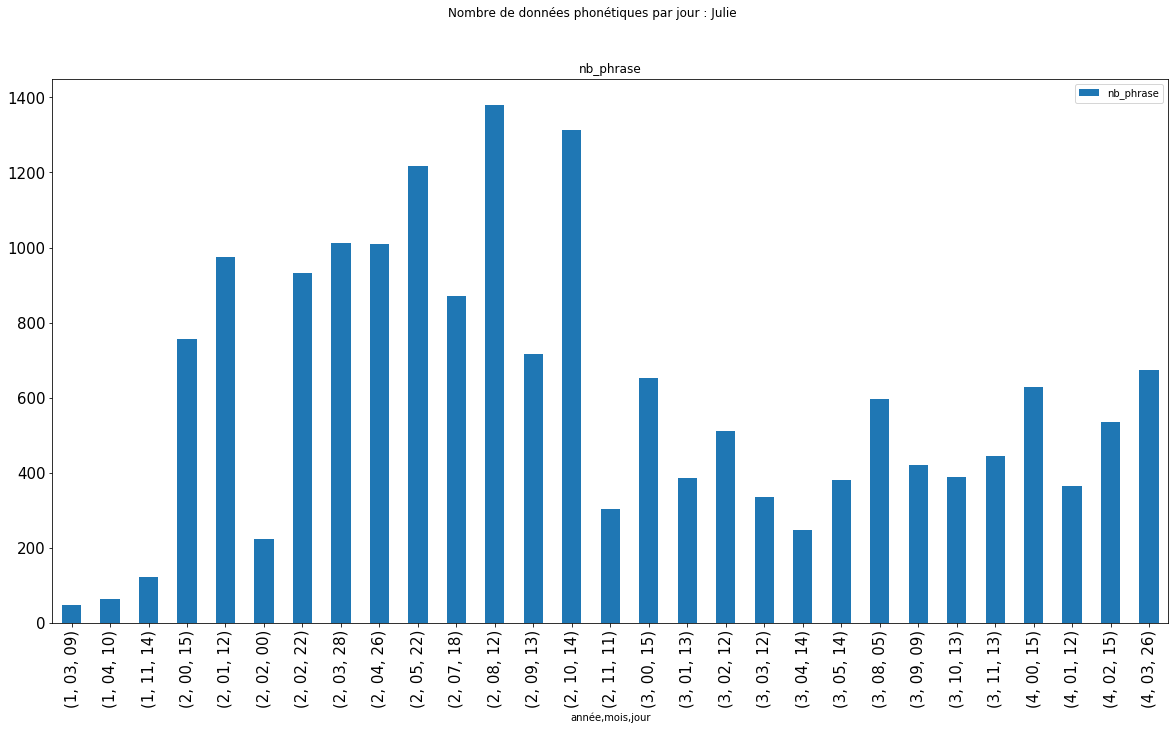

In [36]:
plt = nb_phrase_jour.plot(kind='bar',
                    subplots=True,
                    figsize=(20, 10),
                    title = 'Nombre de données phonétiques par jour : Julie',
                    fontsize = 15,
                    use_index = True)

De cette manière la distribution de la quantité de données phonétique n'est pas continu. En effet nous avons découpé les données de tel sorte à avoir la quantité de données pour chaque retranscription d'Adrien. On remarque des valeurs fluctu : il serait interressant d'observer de plus près pour connaitre les raisons de cette fluctuation : 

* Est-ce du à la durée d'enregistrement ?
* Est-ce du à un problème technique ?
* Est-ce du à l'enfant ?

De plus elle n'est pas distribué de manière équitable dans le temps. <br>
On peut difficelement mesurer la croissance du nombre de prise de parole (on pourrait croiser cette donnée avec la durée de l'enregistrement pour une meilleure mesure). <br>

On a maintenant une meilleure vision de la quantité de données phonétiques à disposition et de leur répartition dans le temps pour Adrien.

## Nombre de mot
Nous allons chercher à explorer le nombre de mot au sens phonétique par phrase. <br>
Pour cela on peut compter le nombre d'espace dans la chaîne de caractère :

In [40]:
#pho_child

In [41]:
# Exemple 
pho = pho_child.at[74089, 'contenu']
print('Nombre de mot dans "' + pho + ' : '+ str(pho.count(' ')+1))

Nombre de mot dans "‹kø kø sa› : 3


Pour chaque ligne on calcul le nombre de mot phonétique :

In [42]:
nb_mot_pho = pho_child.apply(lambda row: row['contenu'].count(' ')+1, axis=1)
pho_child['nombre_mot_phonétique'] = nb_mot_pho #On ajoute une colonne contenant le nombre de mot

C:\Users\lamou\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Par exemple on peut avoir la phrase de Julie avec le plus grand nombre de mot :

In [43]:
a = pho_child.loc[pho_child['nombre_mot_phonétique'] == pho_child['nombre_mot_phonétique'].max()].contenu.values
print(a)
print('longueur: '+str(str(a).count(' ')+1))

['‹e œ̃ bu də fɛs la œ̃ bu də fɛs bjɛ̃ dody si si mwa ʒə vø mɑ̃ʒe mwa ʒ vø mɑ̃ʒe œ̃ pti bu la d adʁijɛ̃ ʒ vø mɑ̃ʒe œ̃ pti bu ʁəɡaʁd si si mwa ʒ vø mɑ̃ʒe œ̃ pti bu pas kə ʒ ɛ fɛ̃›']
longueur: 49


Voici la ligne de cette phrase :

In [44]:
pho_child.loc[pho_child['nombre_mot_phonétique'] == 49 ]

,enfant,age,type,seconde_debut,seconde_fin,contenu,année,mois,jour,nombre_mot_phonétique
35833,ADRIEN,2_09_13,pho,NaN,NaN,‹e œ̃ bu də fɛs la œ̃ bu də fɛs bjɛ̃ dody si s...,2,09,13,49


### Espérance de mot par phrase

In [45]:
mean_nb_mot_pho_jour = pho_child[{'année', 'mois', 'jour', 'nombre_mot_phonétique'}].groupby(['année', 'mois', 'jour']).mean()
mean_nb_mot_pho_jour = mean_nb_mot_pho_jour.rename(columns={'nombre_mot_phonétique': 'espérance_nombre_de_mot_phonétique'})
#mean_nb_mot_pho_jour

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F28C0CC438>],
      dtype=object)

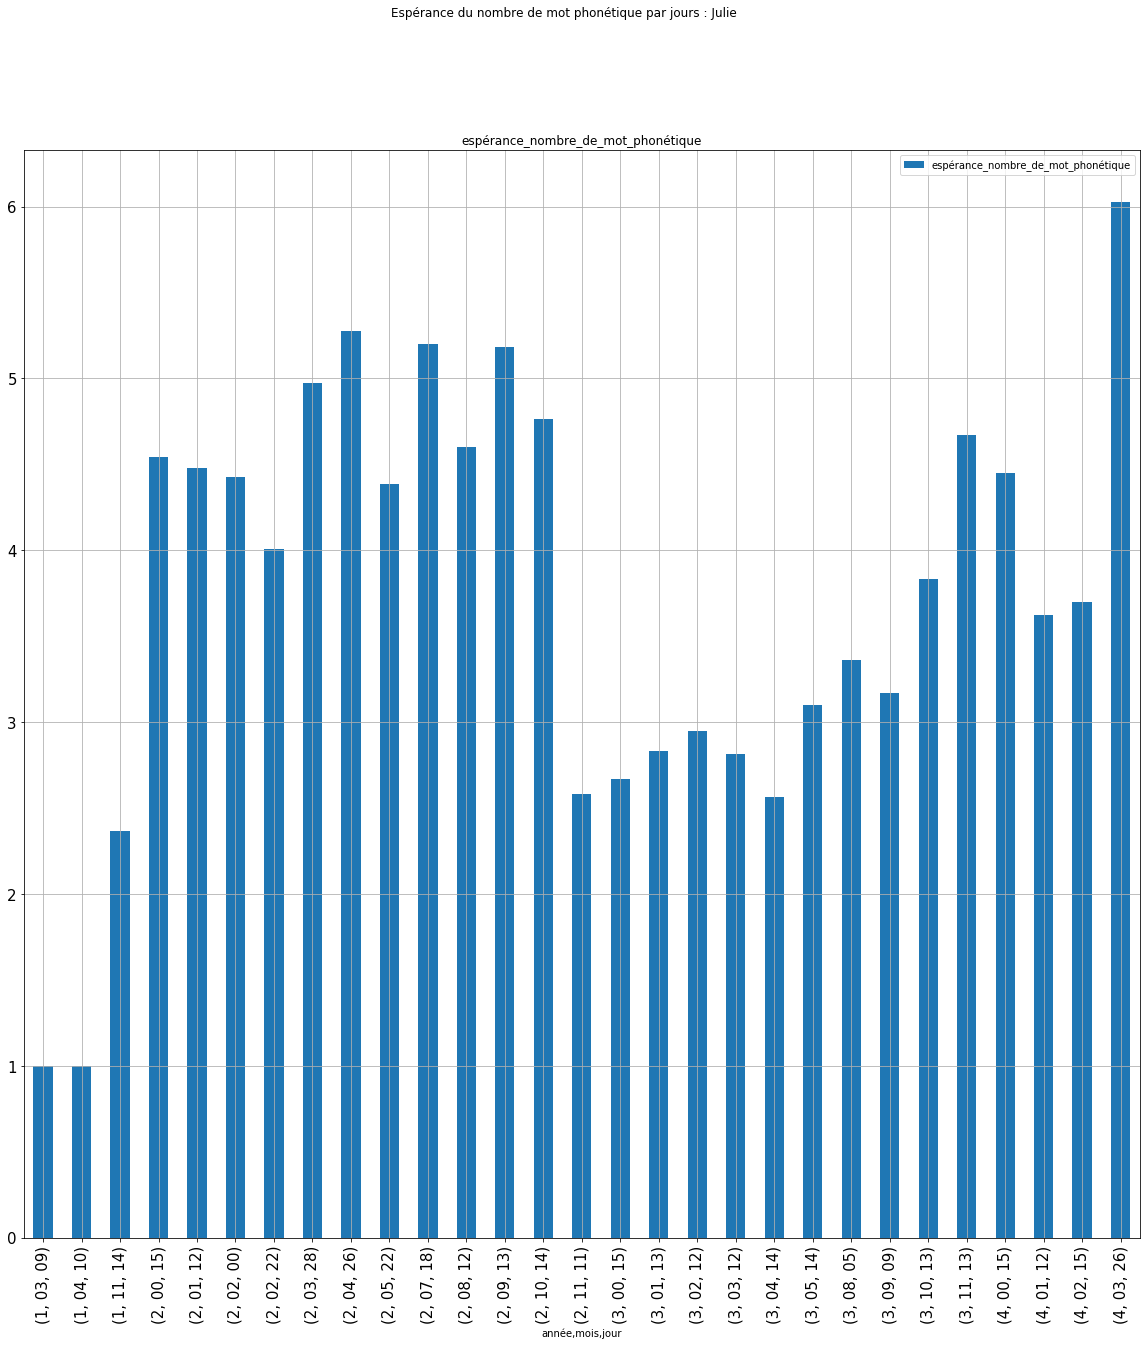

In [46]:
mean_nb_mot_pho_jour.plot(kind='bar', 
                            subplots=True, 
                            figsize=(20, 20),
                            title = 'Espérance du nombre de mot phonétique par jours : Julie',
                            fontsize = 15,
                            use_index = True,
                            grid=True)

* On constaste une distribution de l'espérance étrange

### Variance du nombre de mot par phrase

In [47]:
var_nb_mot_pho_jour = pho_child[{'année','mois','jour', 'nombre_mot_phonétique'}].groupby(['année','mois', 'jour']).var()
var_nb_mot_pho_jour = var_nb_mot_pho_jour.rename(columns={'nombre_mot_phonétique': 'variance'})
#var_nb_mot_pho_jour

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F28C7616A0>],
      dtype=object)

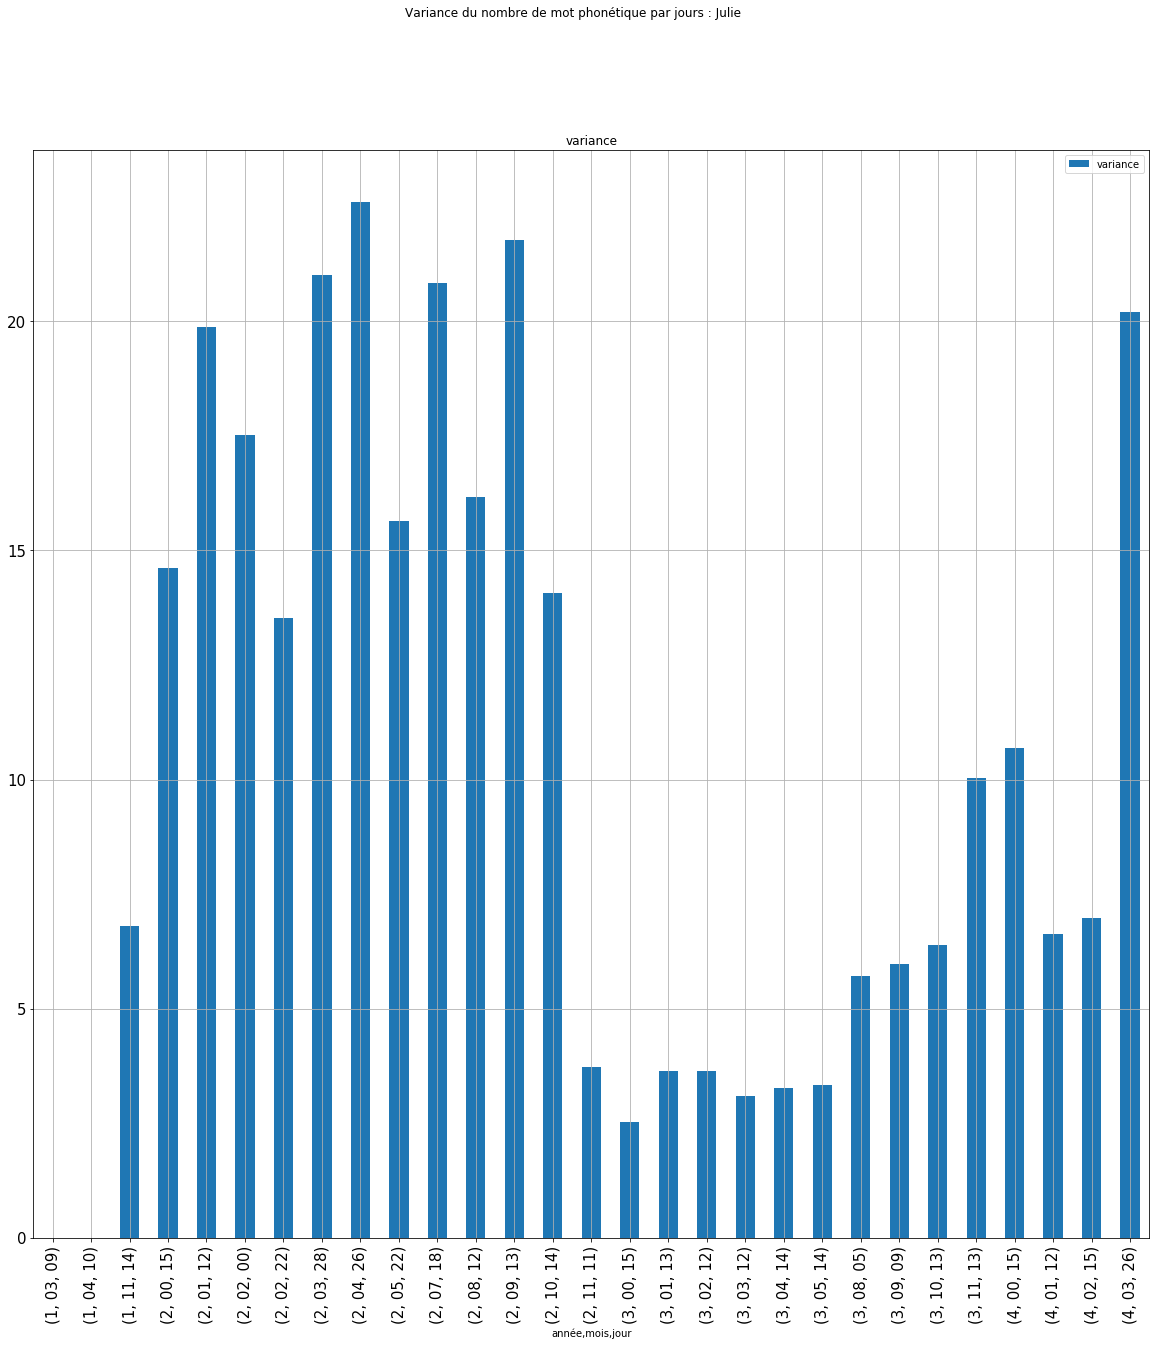

In [48]:
var_nb_mot_pho_jour.plot(kind='bar', 
                            subplots=True, 
                            figsize=(20, 20),
                            title = 'Variance du nombre de mot phonétique par jours : Julie',
                            fontsize = 15,
                            use_index = True,
                            grid=True)

### Plus grande phrase 

In [49]:
max_mot_pho_child = pho_child[{'année','mois','jour', 'nombre_mot_phonétique'}].groupby(['année','mois','jour']).max()
max_mot_pho_child = max_mot_pho_child.rename(columns={'nombre_mot_phonétique': 'longueur_max'})
#max_mot_pho_child

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F28C3D6F60>],
      dtype=object)

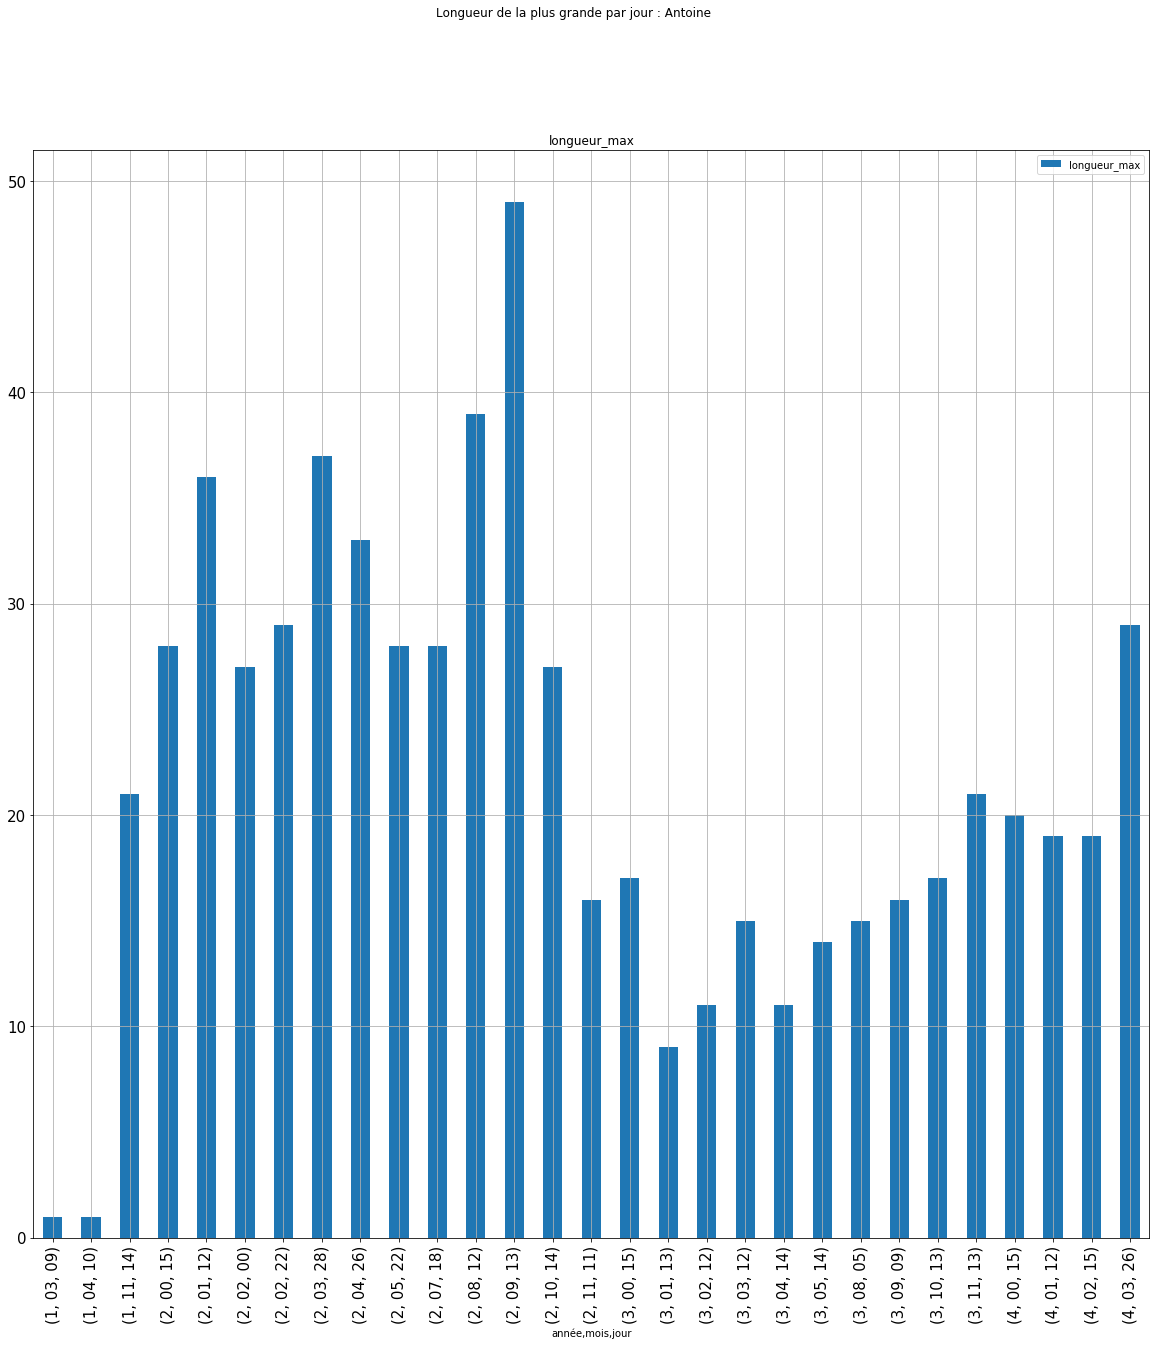

In [50]:
max_mot_pho_child.plot(kind='bar', 
                            subplots=True, 
                            figsize=(20, 20),
                            title = 'Longueur de la plus grande par jour : Antoine',
                            fontsize = 15,
                            use_index = True,
                            grid=True)

On constate encore une distribution étrange

In [54]:
#Exemple: selection des phrases de 12 mots à l'age 2,xx,xx
pho_child.loc[pho_child['année'] == '2'].loc[pho_child.loc[pho_child['année'] == '2']['nombre_mot_phonétique'] == 12]

,enfant,age,type,seconde_debut,seconde_fin,contenu,année,mois,jour,nombre_mot_phonétique
4632,ADRIEN,2_00_15,pho,NaN,NaN,‹adʁijɛ̃ vjɛ̃ vwaʁ j a œ̃ kado il ɛ u l kado›,2,00,15,12
4651,ADRIEN,2_00_15,pho,NaN,NaN,‹sɛ puʁ ki sa vjɛ̃ vwaʁ k ɛs ki j a ddɑ̃›,2,00,15,12
4805,ADRIEN,2_00_15,pho,NaN,NaN,‹bɛ̃ mɛ kɛkə ʃoz la si ty vø va z i mɛ›,2,00,15,12
4878,ADRIEN,2_00_15,pho,NaN,NaN,‹ty vø k ɔ̃ l ɑ̃ ty vø k ɔ̃ l ɑ̃lɛv›,2,00,15,12
5549,ADRIEN,2_00_15,pho,NaN,NaN,‹ty vø k ʒ uvʁ səlɥisi nɔ̃ ɔ̃ va uvʁiʁ səlɥila...,2,00,15,12
5726,ADRIEN,2_00_15,pho,NaN,NaN,‹lə koʃɔ̃ ʁəɡaʁd sa sɛ œ̃ koʃɔ̃ komɑ̃ i fɛ l k...,2,00,15,12
5853,ADRIEN,2_00_15,pho,NaN,NaN,‹e sa ty sɛ diʁ pepe adʁijɛ̃ komɑ̃ ty dizɛ s m...,2,00,15,12
5983,ADRIEN,2_00_15,pho,NaN,NaN,‹fil mwa lot s tə plɛ ɛmʁik ɛmʁik fil mwa lot ...,2,00,15,12
6223,ADRIEN,2_00_15,pho,NaN,NaN,‹wɛ ʒ kʁwa k il ɛ œ̃ pø mɔʁ lə pɛʁ noɛl›,2,00,15,12
6376,ADRIEN,2_00_15,pho,NaN,NaN,‹laʃ tjɛ̃ ʁəɡaʁd l pɛʁ noɛl il ɛ u l pɛʁ noɛl›,2,00,15,12


### Gestion de l'encodage

In [ ]:
import chardet

with open('data_antoine_final.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

result

In [ ]:
#data_antoine_final = pd.read_csv('data_antoine_final.csv', encoding=result['encoding'])
#data_antoine_final